# Intro
This is a walkthrough the proof that group inverses are unique.

In [1]:
# Setup - can be ignored
include("/Users/ksb/Catlab.jl/test/atp/WD.jl"); 
using Catlab.Graphics: to_graphviz, Graphviz, LeftToRight

show_diagram(d::WiringDiagram; 
             w::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             i::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             o::Union{Vector{Pair{Int, String}}, Vector{String}}=String[]) = to_graphviz(
  label(d;w=w,i=i,o=o), orientation=LeftToRight, labels=true, label_attr=:xlabel,
  node_attrs=Graphviz.Attributes(:fontname => "Courier"), 
  edge_attrs=Graphviz.Attributes(:fontname => "Courier"))

function show_diagram(d::ACSet;
             w::Union{Vector{Pair{Int, String}}, Vector{String}}=String[],
             i::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             o::Union{Vector{Pair{Int, String}}, Vector{String}}=String[])
  show_diagram(cospan_to_wd(d); w=w,i=i,o=o)
end;

From apply rewrites to this diagram:

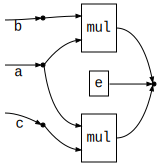

In [2]:
show_diagram(wd_to_cospan(uniq_inv.l, T_group.gens)[2], i=["b","a","c"])

We want to create something that this diagram is homomorphic to.

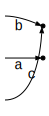

In [3]:
show_diagram(wd_to_cospan(uniq_inv.r, T_group.gens)[2], i=["b","a","c"])

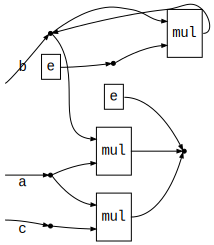

In [16]:
# replace b with b*e
ui = wd_to_cospan(uniq_inv.l, T_group.gens)[2] # initial state
ui2 = apply_eq(ui, T_group, :rightid; forward=false, V=[1=>3])
show_diagram(ui2,i=["b","a","c"])

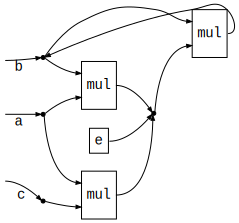

In [17]:
# the e's are the same
ui3 = apply_eq(ui2, T_group, :e_sv, repl=true, V=[1=>2,2=>4])
show_diagram(ui3,i=["b","a","c"])

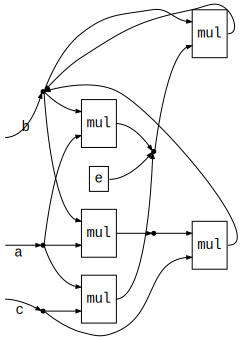

In [18]:
# reassociate b(ac) to (ba)c
ui4 = apply_eq(ui3, T_group, :mul_assoc, forward=false, V=[2=>3])
show_diagram(ui4,i=["b","a","c"])

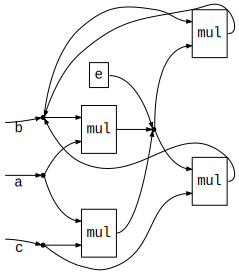

In [19]:
# unify both (b*a) nodes 
ui5 = apply_eq(ui4, T_group, :mul_sv, repl=true, monic=true, V=[3=>4])
show_diagram(ui5,i=["b","a","c"])

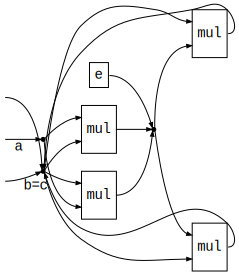

In [22]:
# the e's are the same, so we have e*c = b
ui6 = apply_eq(ui5, T_group, :leftid)
show_diagram(ui6,i=["","a","b=c"]) # now the 1st and 3rd inputs are connected

A total of 5 steps.